# Coding in Germany

<img src='https://pixnio.com/free-images/2017/03/24/2017-03-24-10-10-55-725x483.jpg'></img>

## Introduction

Digitalization has been talking about for years and how it is changing companies. But in the meantime, this no longer only means Apple or Google, but also the German middle class. Today, it is no longer just large software or hardware companies that need developers and programmers for new technologies, but almost every company. Even many nurseries, for example, have a website, many companies need an app or an online shop to stay competitive in the market.

The social network LinkedIn commissioned a study in 2015, for which around 300 managing directors and HR managers in Germany were interviewed. She showed that "understanding of programming" is one of the most important skills of employees, which will continue to gain importance in the future.

That's why I decided with the help of the Stockoverflow 2019 Annual developer survey to get to the bottom of what the 2019 developer scene looks like. Almost 90,000 developers participated and covering everything from developers’ favorite technologies to their job preferences.


In [2]:
#Import librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df19 = pd.read_csv('./survey_results_public.csv')
sm = pd.read_csv('./survey_results_schema.csv')


df19.head()

/opt/anaconda/envs/python36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
#filter for germany
rel_land = ['Germany']

#dropping columns that are not used for further analysis
df_drop = df19[['Country', 'EdLevel', 'UndergradMajor', 'Age', 'Age1stCode', 'OrgSize']]

#dropping every other country than germany
df_germany = df_drop[df_drop['Country'].isin(rel_land)]

df_germany

,Country,EdLevel,UndergradMajor,Age,Age1stCode,OrgSize
13,Germany,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",31.0,16,100 to 499 employees
35,Germany,"Secondary school (e.g. American high school, G...",NaN,21.0,10,"1,000 to 4,999 employees"
43,Germany,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",43.0,12,"10,000 or more employees"
65,Germany,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,7,2-9 employees
84,Germany,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",31.0,15,"Just me - I am a freelancer, sole proprietor, ..."
...,...,...,...,...,...,...
88740,Germany,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",NaN,15,NaN
88779,Germany,NaN,"A social science (ex. anthropology, psychology...",2.0,6,NaN
88804,Germany,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",NaN,14,"1,000 to 4,999 employees"
88829,Germany,"Secondary school (e.g. American high school, G...",NaN,18.0,13,"Just me - I am a freelancer, sole proprietor, ..."


In [9]:
def create_chart(df, column, title, kind):
    '''
    
    Displays a chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    kind: different variations of charts are possible
    
    Returns:
    None
    
    '''
    count_value = df[column].value_counts().sort_values(ascending = False);
    count_value.plot(kind=kind, figsize=(10,8));
    plt.title(title)    

In [21]:
def sum(df, column):
    '''
    
    Displays the summary of the seleced column
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    
    Returns:
    the summary
    
    '''
    sum_value = df[column].value_counts().sum();
    return sum_value

I have built two functions for a couple of repeating sections

## Part I: The Basics 
Developers age and when the begin with coding? 

I set up an plot and whiskers diagram for the age analysis,
it brings out the age distribution quite well. 

Since there some Outliers i cut out everythin over 60 for a better overview.

(0, 60)

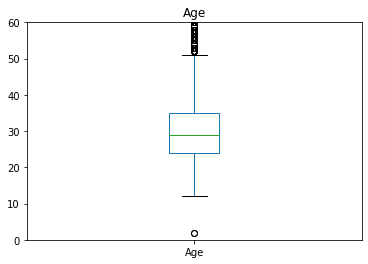

In [14]:
Age = df_germany.Age.value_counts().sort_values(ascending = False)
df_germany.Age.plot.box()
plt.title("Age")
axis = plt.gca()
axis.set_ylim(0, 60)

In [34]:
Age = df_germany.Age.mean()
Age

30.176592178770946

The average age structure of the developers is slightly over 30 years. 
The range as you can see in the diagram is from mid-20 to mid-30 corresponds to a very good mix.

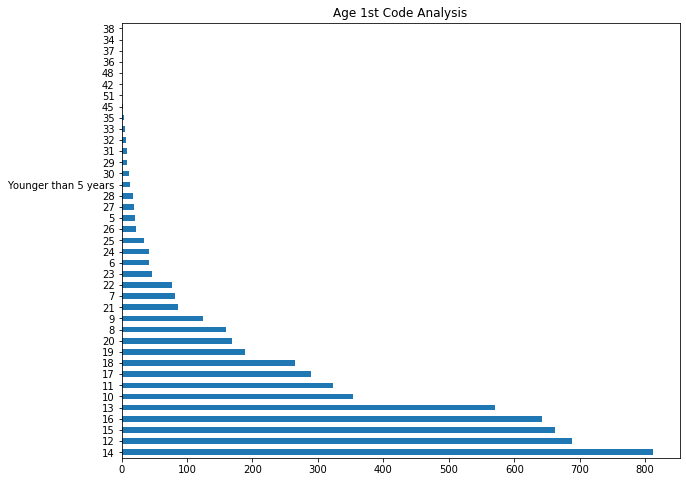

In [15]:
create_chart(df_germany, "Age1stCode", "Age 1st Code Analysis", "barh")

It is also interesting to ask at what age these people first came into contact with programming.
After the analysis you can see in the diagram above that most of them started programming when they were teenagers.
A good transition to my second key question, which deals with educational background. 

Has the classic IT education path been taken here, as might suspect?

## Part II: Background
Whats the educational background of the developers?

In [22]:
sum(df_germany, 'UndergradMajor')

4465

In [23]:
sum(df_germany, 'EdLevel')

5674

When checking the total sum of the major and educational level, it is noticeable that the field major contains many nan values.

So that these are included in the comparison, I decided to replace the values with a dummy value. In this case I used "Empty".

In [24]:
#Fillup the Nan values
df_germany['UndergradMajor'].fillna('Empty', inplace=True)
df_germany['EdLevel'].fillna('Empty', inplace=True)

print(sum(df_germany, 'UndergradMajor'))
print(sum(df_germany, 'UndergradMajor'))

5866
5866


/opt/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


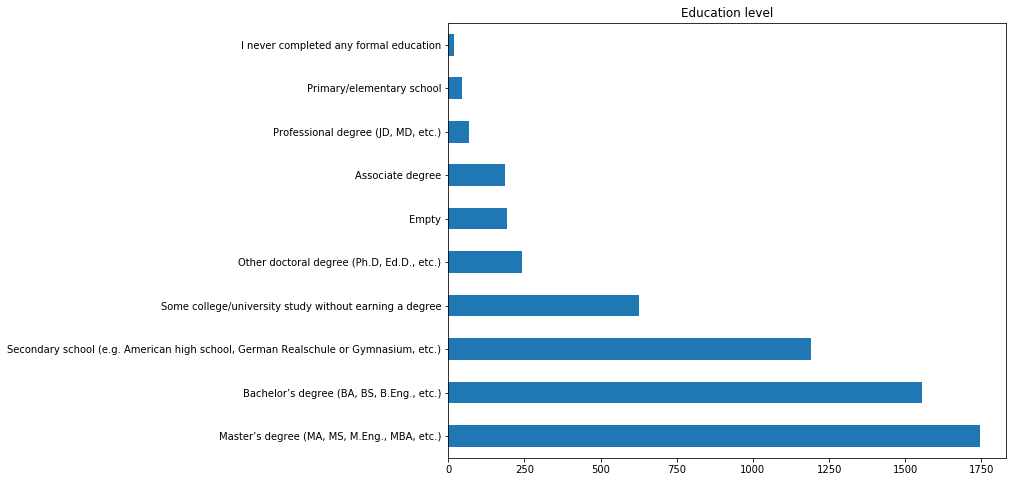

In [25]:
create_chart(df_germany, "EdLevel", "Education level", "barh")

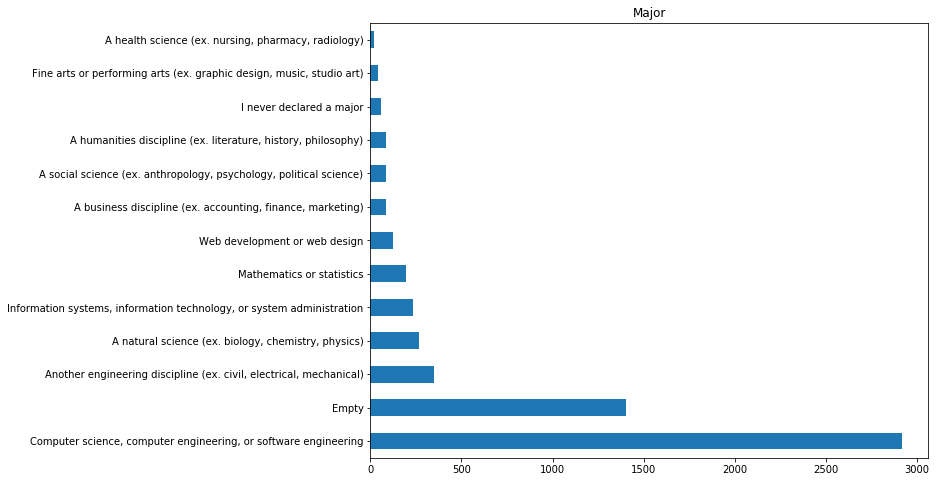

In [26]:
create_chart(df_germany, "UndergradMajor", "Major", "barh")

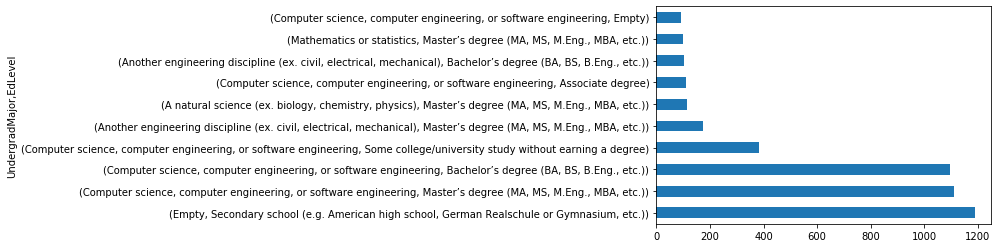

In [27]:
#education plot

compare = df_germany.groupby('UndergradMajor').EdLevel.value_counts().sort_values(ascending = False)

temp = compare.sort_values(ascending=False)


compare[:10].plot.barh();

As you can see, many developers continue to educate themselves who have no higher education.

From this it can be deduced that programming is also an option for career changers.

One might consider introducing programming to the education system as a major at high school.

## Part III: Organization
Do small companies also have developers among their employees?

By simple analyzing the Organisation Structure in an p

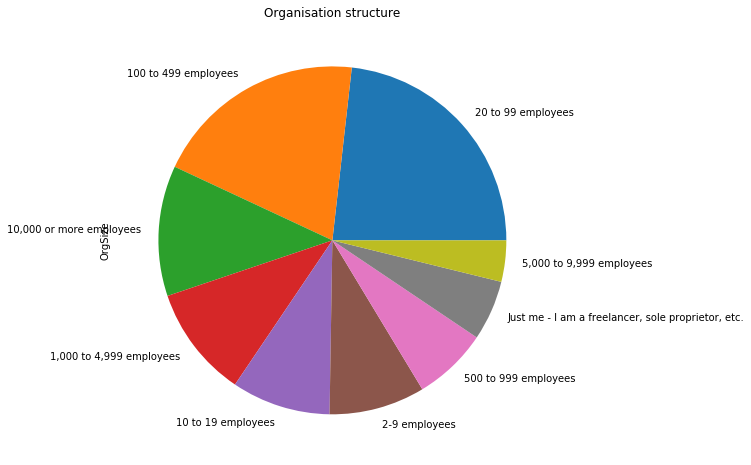

In [29]:
create_chart(df_germany, "OrgSize", "Organisation structure", "pie")

Based on the data, we see that the majority of developers are active in medium-sized companies.

Large companies are less represented, which suggests that external contracts are being placed here.


## Conclution

At the end of my rather limited analysis it can be said, that the development scene in Germany is quite well positioned.

The age structure corresponds in a good area and covers the beginner as well as the experienced career area.

The educational offers are very beginner-friendly, which can be seen  in the educational statistics, not only hardcore IT graduates are present, but also career changers with a lower educational background.

The corporate structure shows that a large number of developers are located in the middle class, but there are also freelancers who are sure to be happy to move the nursery next door into the digital age.